In [1]:
import pandas as pd
import numpy as np

from graphviz import Digraph

from roc_evals import *

In [2]:
cen_normal = "normal/inter/"
cen_media2 = "mean2/inter/"
cen_media5 = "mean5/inter/"

cen_normal_rate = cen_normal+"rates/"
cen_media2_rate = cen_media2+"rates/"
cen_media5_rate = cen_media5+"rates/"

In [3]:
def graph(df, limite, eng = 'dot'):
    g = Digraph(engine=eng)
    for k, row in enumerate(df.index):
        if any(df.iloc[k]>=limite) or any(df[row] >= limite):
            g.node(str(k),row, shape='oval', fontsize='10', width='0') 

    for j, col in enumerate(df.columns):
        for i, row in enumerate(df[col]):
            if row  >=limite:
                g.edge(str(i), str(j), label=str(np.round(row,3)),\
                       color="#000000{:02x}".format(int(255)))
                
                       #* row//max(df.max()))
    return g 

In [4]:
def eval_save_metrics(path_cen, path_cen_rate, ref_df):
    windows =((1/(0.6))*np.arange(5,35,5)).astype(int)
    all_settings = [str(np.round(w*0.6)) for w in windows]
   
    for setting in (all_settings):
        conf = generate_conf_df(pd.read_csv(path_cen+setting+"_sel_corr.csv", index_col=0), ref_df)
        conf.to_csv(path_cen_rate+"conf_"+setting+".csv")
        
        df_met = pd.DataFrame([[tp_rate(conf), fp_rate(conf), precision(conf), fn_rate(conf), total_error(conf), f1_score(conf)]], columns = ['tp_rate', 'fp_rate', 'precisao','fn_rate', 'total_error', 'f1_score'])
        df_met.to_csv(path_cen_rate+"metricas_"+setting+".csv")

In [5]:
def metrics_plots(cen_rate_path):
    
    windows = ((1/(0.6))*np.arange(5,35,5)).astype(int)
    all_settings = [str(w) for w in windows]
    df_var_h = pd.DataFrame(columns=['tp_rate', 'fp_rate', 'precisao', 'fn_rate', 'total_error', 'f1_score'], index=np.round(windows*0.6))
    dfs = []
    count_cen = 0
    for cen in all_settings:
        df_var_h.iloc[count_cen] = (pd.read_csv(cen_rate_path+"metricas_"+cen+".csv", index_col=0).loc[0]).apply(lambda x: np.round(x,3)*100)
        count_cen +=1        
        if count_cen > 5:
            count_cen = 0
            dfs.append(df_var_h)
            display(df_var_h)
            df_var_h = pd.DataFrame(columns=['tp_rate', 'fp_rate', 'precisao', 'fn_rate', 'total_error', 'f1_score'], index=np.round(windows*0.6))

In [6]:
#defining ref def 

col_labels = ['xmeas%02d_low' % x for x in [1,2,3,8,9,21]]+ ['xmeas%02d_high' % x for x in [1,2,3,8,9,21]] 
df_mat = np.zeros([12,12], dtype=int)

ref_df = pd.DataFrame(df_mat, columns = col_labels, index=col_labels)
ref_df.loc['xmeas01_low'][['xmeas21_high', 'xmeas09_low']] = [1,1]
ref_df.loc['xmeas09_low']['xmeas21_high'] = 1

ref_df.loc['xmeas01_high'][['xmeas21_low', 'xmeas09_high']] = [1,1]
ref_df.loc['xmeas09_high']['xmeas21_low'] = 1

In [25]:
eval_save_metrics(cen_normal, cen_normal_rate, ref_df)

In [26]:
eval_save_metrics(cen_media2,cen_media2_rate, ref_df)

In [27]:
eval_save_metrics(cen_media5,cen_media5_rate, ref_df)

In [28]:
metrics_plots(cen_normal_rate)

,tp_rate,fp_rate,precisao,fn_rate,total_error,f1_score
5.0,33.3,0.9,66.7,66.7,4.2,44.4
10.0,33.3,0.9,66.7,66.7,4.2,44.4
15.0,33.3,0.9,66.7,66.7,4.2,44.4
20.0,50,0.9,75,50,3.3,60
25.0,50,0.9,75,50,3.3,60
30.0,50,3.5,42.9,50,5.8,46.2


In [29]:
metrics_plots(cen_media2_rate)

,tp_rate,fp_rate,precisao,fn_rate,total_error,f1_score
5.0,33.3,2.6,40,66.7,5.8,36.4
10.0,33.3,2.6,40,66.7,5.8,36.4
15.0,33.3,2.6,40,66.7,5.8,36.4
20.0,50,2.6,50,50,5,50
25.0,50,3.5,42.9,50,5.8,46.2
30.0,50,5.3,33.3,50,7.5,40


In [30]:
metrics_plots(cen_media5_rate)

,tp_rate,fp_rate,precisao,fn_rate,total_error,f1_score
5.0,33.3,0.9,66.7,66.7,4.2,44.4
10.0,33.3,0.9,66.7,66.7,4.2,44.4
15.0,33.3,0.9,66.7,66.7,4.2,44.4
20.0,50,0.9,75,50,3.3,60
25.0,50,0.9,75,50,3.3,60
30.0,50,2.6,50,50,5,50


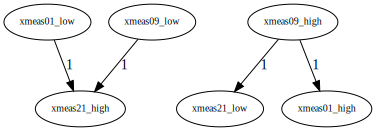

In [31]:
df = pd.read_csv(cen_normal+"20.0_sel_corr.csv", index_col=0)
graph(df,1)

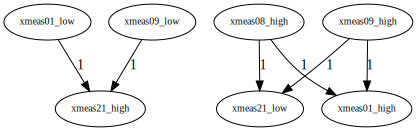

In [37]:
df = pd.read_csv(cen_media2+"20.0_sel_corr.csv", index_col=0)
graph(df,1)

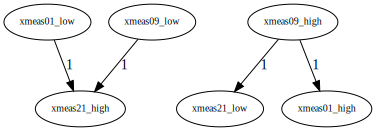

In [38]:
df = pd.read_csv(cen_media5+"20.0_sel_corr.csv", index_col=0)
graph(df,1)